Importamos los paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Variable para intercalar tarea 4 entre uso de imagen o webcam

In [22]:
use_webcam = False
image = "imagen_retina.jpg"

## Tarea 1
Crear una imagen con la textura de un tablero de ajedréz

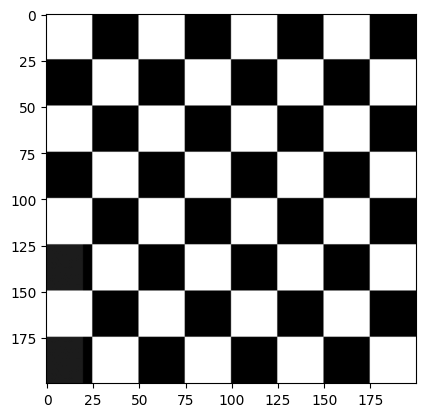

In [ ]:
alto = 200
ancho = 200
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)
gris_img[110:220,0:20,0] = 28

gris_img[0:10,20:20,0] = 255
for f in range(0,alto,50):
    for c in range(0,ancho,50):
        gris_img[f:f+25,c:c+25,0] = 255
        gris_img[f+25:f+50,c+25:c+50,0] = 255

plt.imshow(gris_img, cmap='gray')
plt.imshow(gris_img, cmap='gray',vmin=0, vmax=255)
plt.show()

## Tarea 2
Crear una imagen estilo Mondrian con las funciones de dibujo de OpenCV

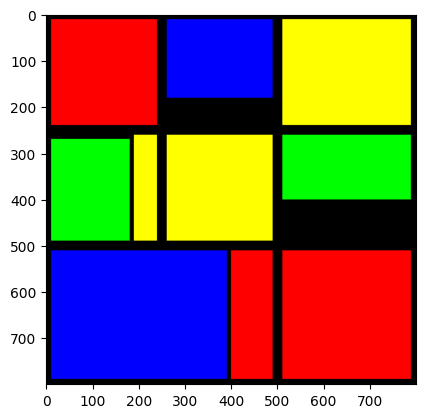

In [9]:
alto = 800
ancho = 800
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

cv2.rectangle(color_img, (10, 10), (250, 250), (255, 0, 0), -1)
cv2.rectangle(color_img, (260, 10), (500, 180), (0, 0, 255), -1)
cv2.rectangle(color_img, (510, 10), (790, 250), (255, 255, 0), -1)
cv2.rectangle(color_img, (10, 260), (180, 500), (0, 0, 0), -1)
cv2.rectangle(color_img, (0,270), (180,490),(0, 255, 0), -1 )
cv2.rectangle(color_img, (190, 260), (500, 500), (255, 255, 0), -1)
cv2.rectangle(color_img, (510, 260), (790, 400), (0, 255, 0), -1)
cv2.rectangle(color_img, (10, 510), (390, 790), (0, 0, 255), -1)
cv2.rectangle(color_img, (400, 510), (790, 790), (255, 0, 0), -1)

cv2.rectangle(color_img, (0, 0), (799, 799), (0, 0, 0), 20)
cv2.line(color_img, (250, 0), (250, 500), (0, 0, 0), 20)
cv2.line(color_img, (500, 0), (500, 800), (0, 0, 0), 20)
cv2.line(color_img, (0, 250), (800, 250), (0, 0, 0), 20)
cv2.line(color_img, (0, 500), (800, 500), (0, 0, 0), 20)

plt.imshow(color_img) 
plt.show()

## Tarea 3
Modificar de forma libre los valores de de un plano de la imagen

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):      
    ret, frame = vid.read()

    if ret:
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        h, w, c = frame.shape

        #Tarea
        b = 255 - b
        r = cv2.add(r, 100)
        

        collage = np.hstack((r, g, b))
    
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    if cv2.waitKey(20) == 27:
        break
  
vid.release()
cv2.destroyAllWindows()

## TAREA 4
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

### Selección por píxeles

In [23]:
if use_webcam:
    vid = cv2.VideoCapture(0)
else:
    frame = cv2.imread(image)

while True:
    if use_webcam:
        ret, frame = vid.read()
        if not ret:
            break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray)

    cv2.circle(frame, max_loc, 5, (0,0,255), 2)
    cv2.circle(frame, min_loc, 5, (255,0,0), 2)

    cv2.imshow("Webcam - extremos con minMaxLoc", frame)

    if not use_webcam:
        cv2.waitKey(0)
        break

    if cv2.waitKey(20) == 27:
        break

if use_webcam:
    vid.release()
cv2.destroyAllWindows()


### Selección por Bloque

In [ ]:
block_size = 50

if use_webcam:
    vid = cv2.VideoCapture(0)
else:
    frame = cv2.imread(image)

while True:
    if use_webcam:
        ret, frame = vid.read()
        if not ret:
            break

    luminosity = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    h, w = luminosity.shape

    min_val = 255
    max_val = 0
    min_pos = (0,0)
    max_pos = (0,0)

    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            block = luminosity[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            if block_mean < min_val:
                min_val = block_mean
                min_pos = (x + block_size//2, y + block_size//2)
            if block_mean > max_val:
                max_val = block_mean
                max_pos = (x + block_size//2, y + block_size//2)

    cv2.circle(frame, min_pos, block_size//2, (0,0,128), -1)
    cv2.circle(frame, max_pos, block_size//2, (128,255,128), -1)

    cv2.imshow('Cam', cv2.flip(frame,1))

    if not use_webcam:
        cv2.waitKey(0)
        break

    if cv2.waitKey(20) == 27:
        break

if use_webcam:
    vid.release()
cv2.destroyAllWindows()


## Tarea 5
Llevar a cabo tu propuesta de Pop-Art

In [ ]:
vid = cv2.VideoCapture(0)

w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    ret, frameIN = vid.read()

    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r

        tr[:,:,0] = 255 - r
        tr[:,:,1] = 96 - g
        tr[:,:,2] = 55 + b
        
        bl[:,:,0] = b
        bl[:,:,1] = g
        bl[:,:,2] = r

        mosaic_triangles = np.zeros_like(frame)
        block = 8
        for y in range(0, frame.shape[0], block):
            for x in range(0, frame.shape[1], block):
                x2, y2 = x + block, y + block
                color = frame[y:y+block,x:x+block].mean(axis=(0, 1)).tolist()
                pts = np.array([[x, y], [x2, y], [(x+x2)//2, y2]], np.int32)
                cv2.fillPoly(mosaic_triangles, [pts], color)

        bl[:,:,] = mosaic_triangles

        br[:,:,0] = 255 -b
        br[:,:,1] = 159  + g
        br[:,:,2] = 255 + r
    
        cv2.imshow('Cam', collage)
    
    if cv2.waitKey(20) == 27:
        break
  
vid.release()
cv2.destroyAllWindows()